# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização 
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



### Identificação do Aluno

#### Nome Completo

Jonatas Duarte Souza

#### RA

11036516

## Importação e preparação dos dados

In [245]:
%matplotlib inline

In [246]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [247]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [248]:
iris = load_iris()
x = iris.data
y = iris.target
pca = PCA(2)
x_pca = pca.fit_transform(x)

X_train, X_test, Y_train, Y_test = tts(x_pca, y, test_size=0.20, random_state=1)

## Clusterização 

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [249]:
c0=[]; c1=[]; c2=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    else:
        c2.append(X_train[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

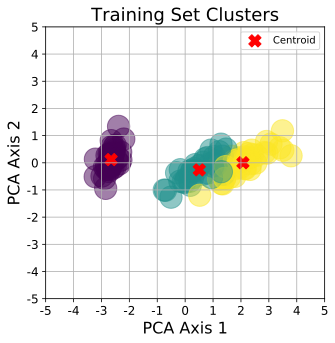

In [250]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [251]:
kmeans = KMeans(3)
kmeans.fit(X_train)
Y_pred = kmeans.predict(X_test)

Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [252]:
print(kmeans.cluster_centers_)

[[ 0.68173282 -0.35238546]
 [-2.65383975  0.11705589]
 [ 2.3377336   0.22271938]]


Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [253]:
print(kmeans.inertia_)

50.98309801646353


Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

ValueError: Invalid RGBA argument: 17

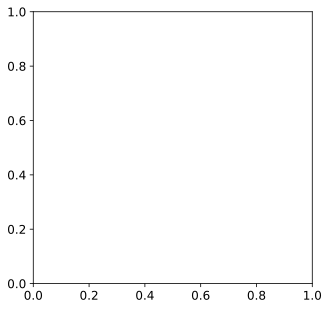

In [254]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [255]:
AP = AffinityPropagation()
AP.fit(X_train)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

Mostre os centróides dos grupos.

In [256]:
print(AP.cluster_centers_)

[[ 0.04522698 -0.58383438]
 [-2.78610927 -0.235112  ]
 [ 1.16932634 -0.16499026]
 [ 3.39703874  0.55083667]
 [ 2.14424331  0.1400642 ]
 [-2.54370523  0.43299606]]


Mostre os índices dos grupos.

In [257]:
print(AP.cluster_centers_indices_)

[ 2 33 42 64 79 83]


Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [258]:
y_pred_ap = AP.predict(X_test)

Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

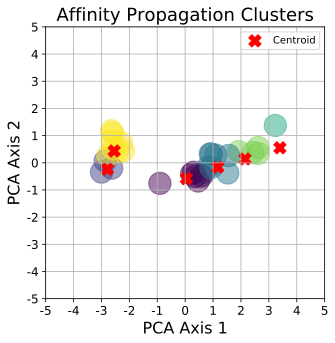

In [259]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=AP.cluster_centers_[:,0], y=AP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Aplicação - Compressão de Imagem

Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [370]:
n_cores = 30

ori_img = plt.imread('fish.jpg')
img = np.array(ori_img, dtype=np.float64)
img = np.array([[[pix / max_val for pix in col] for col in lin] for lin in img])
print(img.shape)
w, h, d = img.shape

(1786, 2176, 3)


Exiba a imagem

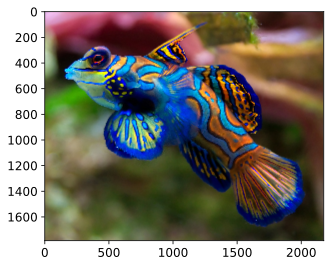

In [371]:
plt.imshow(ori_img)

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [372]:
img = img.reshape(len(img) * len(img[0]), len(img[0][0]))
print(img.shape)

(3886336, 3)


Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [373]:
X = shuffle(img[:1000])
kmeans = KMeans(n_cores)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [374]:
grupos = kmeans.predict(img)

Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [375]:
codebook_random = shuffle(img, n_samples=n_cores)
pairwise_distances_argmin(codebook_random, img, axis=0)

array([13, 13, 13, ..., 16, 16, 16])

In [376]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((w, h, d))
    grupo_idx = 0
    for i in range(w):
        for j in range(h):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

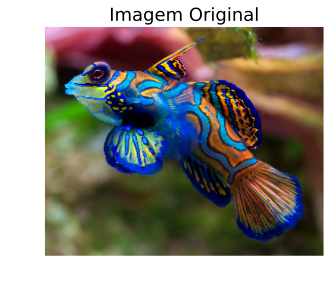

In [377]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(ori_img)

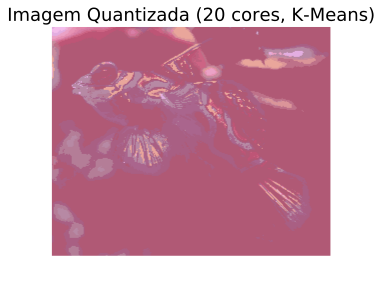

In [380]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

In [379]:
### Escreva seu código aqui ###